In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
pd.options.display.max_rows = None
pd.options.display.max_columns = None
from sklearn.model_selection import train_test_split



---

# Uber-Lyft Price Prediction

## Overview
This notebook explores the prediction of ride prices for Uber and Lyft using both traditional machine learning models and deep neural networks (DNN). The goal is to analyze the effectiveness of different approaches in accurately forecasting prices based on various input features.

## About Me
My name is **Khaled Ashraf**, and I am a data enthusiast with a focus on machine learning and data analysis. I enjoy exploring different modeling techniques to solve real-world problems and derive insights from data. In this project, I apply both traditional and deep learning approaches to predict Uber and Lyft ride prices, showcasing my skills in data preprocessing, analysis, and modeling.

## Table of Contents
1. Introduction
2. Data Preparation
3. Exploratory Data Analysis (EDA)
4. Modeling
   - Traditional Models
   - Deep Learning Models
5. Comparison and Analysis
6. Conclusion

## 1. Introduction

## 2. Data Preparation

## 3. Exploratory Data Analysis (EDA)

## 4. Modeling
### Traditional Models
### Deep Learning Models

## 5. Comparison and Analysis

## 6. Conclusion

---



In [2]:
data =pd.read_csv("/kaggle/input/uber-and-lyft-dataset-boston-ma/rideshare_kaggle.csv")
data.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [3]:
data.shape

(693071, 57)

In [4]:
data.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

In [5]:
data.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [7]:
data.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,35.881222,0.008922,0.146076,0.741119,6.186253,8.469860,1.544049e+09,8.467970,45.040982,1.544050e+09,34.150736,1.544102e+09,41.614054,1.544050e+09,30.139824,1.544099e+09,31.656256,1010.094766,220.055853,0.686502,0.248908,8.467970,313.513635,1.544027e+09,1.544060e+09,0.579066,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,7.918707,0.026901,0.328938,0.138595,3.148223,5.289179,6.928244e+05,2.602888,5.996541,6.937921e+05,6.383163,6.922923e+05,7.666138,6.941699e+05,8.057468,6.927378e+05,9.142355,13.472899,99.102736,0.358534,0.474097,2.602888,27.953061,6.911393e+05,6.906634e+05,0.244705,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,12.130000,0.000000,0.000000,0.380000,0.450000,0.800000,1.543151e+09,0.717000,32.680000,1.543154e+09,17.850000,1.543234e+09,22.620000,1.543187e+09,11.810000,1.543234e+09,4.390000,988.090000,2.000000,0.000000,0.000000,0.717000,269.400000,1.543147e+09,1.543181e+09,0.090000,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,31.910000,0.000000,0.000000,0.640000,3.410000,4.060000,1.543432e+09,8.432000,42.570000,1.543439e+09,30.170000,1.543489e+09,36.570000,1.543439e+09,27.700000,1.543478e+09,27.490000,999.820000,124.000000,0.370000,0.000000,8.432000,290.900000,1.543406e+09,1.543440e+09,0.300000,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,35.900000,0.000000,0.000000,0.710000,5.910000,7.550000,1.543756e+09,9.880000,44.680000,1.543788e+09,34.180000,1.543817e+09,40.950000,1.543788e+09,30.030000,1.543817e+09,30.690000,1009.250000,258.000000,0.820000,0.000000,9.880000,307.400000,1.543752e+09,1.543785e+09,0.680000,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,40.080000,0.000000,0.000000,0.880000,8.410000,11.740000,1.544846e+09,9.996000,46.910000,1.544814e+09,38.730000,1.544836e+09,44.120000,1.544818e+09

In [8]:
data.groupby(["cab_type","name"])['price'].sum()

cab_type  name        
Lyft      Lux              910509.50
          Lux Black       1181605.55
          Lux Black XL    1656124.55
          Lyft             492413.68
          Lyft XL          784375.20
          Shared           308929.50
Uber      Black           1130758.00
          Black SUV       1668679.50
          Taxi                  0.00
          UberPool         482184.00
          UberX            537997.00
          UberXL           863803.00
          WAV              538013.50
Name: price, dtype: float64

In [9]:
data.dropna(axis=0,inplace=True)

In [10]:
data.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

In [11]:
data['cab_type'].value_counts()

cab_type
Uber    330568
Lyft    307408
Name: count, dtype: int64

**The oldest and newest date in the data set**

In [12]:
data['datetime'].min()


'2018-11-26 03:40:46'

In [13]:
data['datetime'].max()

'2018-12-18 19:15:10'

**The minimum and mximum distance in mile**

In [14]:
data['distance'].min() #mile

0.02

In [15]:
data['distance'].max() #mile

7.86

# **List comperhensive**

In [16]:
list = [x.lower() for x in (data['name'].unique())]
print(f"List comprehension - name  : {list}")

List comprehension - name  : ['shared', 'lux', 'lyft', 'lux black xl', 'lyft xl', 'lux black', 'uberxl', 'black', 'uberx', 'wav', 'black suv', 'uberpool']


In [17]:
print(data['visibility'].head(10))
print(data['visibility.1'].head(10))


0    10.000
1     4.786
2    10.000
3    10.000
4    10.000
5     8.325
6     4.675
7     3.052
8     1.413
9     2.686
Name: visibility, dtype: float64
0    10.000
1     4.786
2    10.000
3    10.000
4    10.000
5     8.325
6     4.675
7     3.052
8     1.413
9     2.686
Name: visibility.1, dtype: float64


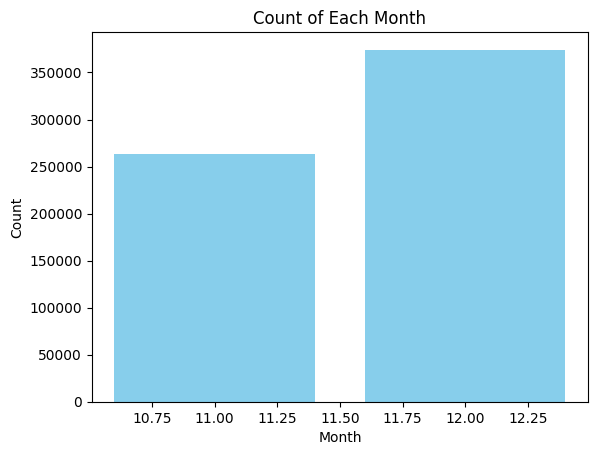

In [18]:
import matplotlib.pyplot as plt

month_counts = data['month'].value_counts().sort_index()

plt.bar(month_counts.index, month_counts.values, color='skyblue')

plt.xlabel('Month')
plt.ylabel('Count')

plt.title('Count of Each Month')

plt.show()


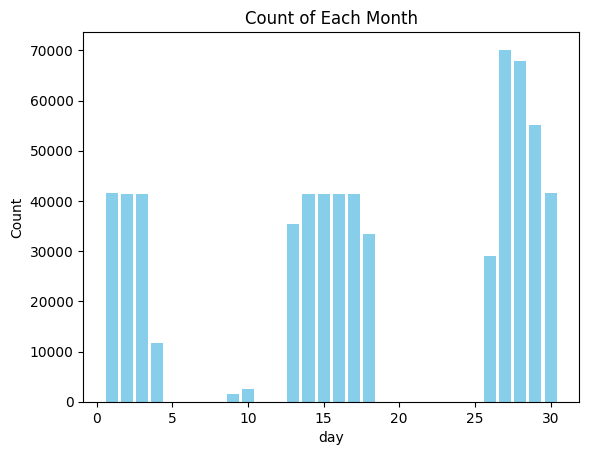

In [19]:
import matplotlib.pyplot as plt

month_counts = data['day'].value_counts().sort_index()

plt.bar(month_counts.index, month_counts.values, color='skyblue')

plt.xlabel('day')
plt.ylabel('Count')

plt.title('Count of Each Month')

plt.show()

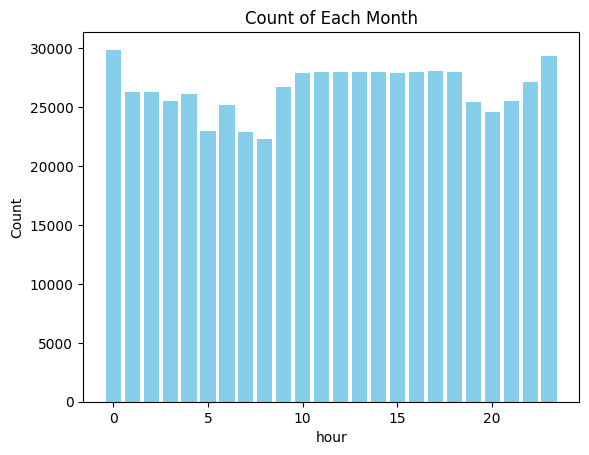

In [20]:
import matplotlib.pyplot as plt

month_counts = data['hour'].value_counts().sort_index()

plt.bar(month_counts.index, month_counts.values, color='skyblue')

plt.xlabel('hour')
plt.ylabel('Count')

plt.title('Count of Each Month')

plt.show()

In [21]:
data.groupby(by=["destination","source"]).agg({'latitude':'mean','longitude':'mean'})

latitude  longitude
destination             source                                       
Back Bay                Boston University        42.336960 -71.066178
                        Fenway                   42.337740 -71.065822
                        Haymarket Square         42.337087 -71.065110
                        North End                42.338100 -71.066343
                        Northeastern University  42.336668 -71.065314
                        South Station            42.338897 -71.065908
Beacon Hill             Boston University        42.336917 -71.065885
                        Fenway                   42.338990 -71.065719
                        Haymarket Square         42.337413 -71.066059
                        North End                42.338418 -71.065809
                        Northeastern University  42.337268 -71.066061
                        South Station            42.336316 -71.065699
Boston University       Back Bay                 42.337217 -71.065947
                        Beacon Hill              42.339364 -71.066517
                        Financial District       42.339361 -71.066465
                        North Station            42.338372 -71.066191
                        Theatre District         42.338152 -71.066276
                        West End                 42.337556 -71.066265
Fenway                  Back Bay                 42.340103 -71.065819
                        Beacon Hill              42.337595 -71.065471
                        Financial District       42.337147 -71.066254
                        North Station            42.339660 -71.066504
                        Theatre District         42.336378 -71.065388
                        West End                 42.338521 -71.066339
Financial District      Boston University        42.338733 -71.066581
                        Fenway                   42.337034 -71.066028
                        Haymarket Square         42.337781 -71.065863
                        North End                42.338338 -71.065965
                        Northeastern University  42.338523 -71.065964
                        South Station            42.338989 -71.067037
Haymarket Square        Back Bay                 42.339877 -71.066475
                        Beacon Hill              42.337246 -71.065966
                        Financial District       42.337398 -71.066237
                        North Station            42.338276 -71.066073
                        Theatre District         42.338175 -71.065699
                        West End                 42.339109 -71.066251
North End               Back Bay                 42.338516 -71.066170
                        Beacon Hill              42.336792 -71.066216
                        Financial District       42.337654 -71.066158
                        North Station            42.339309 -71.066936
                        Theatre District         42.338578 -71.066639
                        West End                 42.338614 -71.065878
North Station           Boston University        42.338786 -71.066362
                        Fenway                   42.338450 -71.066614
                        Haymarket Square         42.337260 -71.066279
                        North End                42.337672 -71.065832
                        Northeastern University  42.337793 -71.066491
                        South Station            42.336529 -71.065432
Northeastern University Back Bay                 42.338917 -71.066289
                        Beacon Hill              42.339002 -71.065600
                        Financial District       42.337789 -71.066015
                        North Station            42.339770 -71.066493
                        Theatre District         42.338356 -71.065319
                        West End                 42.336812 -71.066274
South Station           Back Bay                 42.338567 -71.065891
                        Beacon Hill              42.338714 -

In [22]:
import geopandas as gpd
import folium
from folium.plugins import FastMarkerCluster
df1 = data[data['source']=='Haymarket Square']
my_map = folium.Map(location=[df1["latitude"].mean(), df1["longitude"].mean()],zoom_start = 10)
my_map.add_child(FastMarkerCluster(df1[['latitude', 'longitude']].values.tolist(),color='green'))
my_map

In [23]:
data.groupby(by=["source","destination"]).price.agg(["mean"])

mean
source                  destination                       
Back Bay                Boston University        14.039392
                        Fenway                   13.658752
                        Haymarket Square         17.987384
                        North End                19.473019
                        Northeastern University  13.151040
                        South Station            17.700711
Beacon Hill             Boston University        16.376737
                        Fenway                   16.158840
                        Haymarket Square         13.799137
                        North End                15.270942
                        Northeastern University  16.471792
                        South Station            15.950661
Boston University       Back Bay                 13.992801
                        Beacon Hill              17.315535
                        Financial District       24.146085
                        North Station            20.185338
                        Theatre District         18.689557
                        West End                 18.611766
Fenway                  Back Bay                 13.802155
                        Beacon Hill              16.796674
                        Financial District       23.438818
                        North Station            19.701839
                        Theatre District         18.232722
                        West End                 18.161806
Financial District      Boston University        25.498434
                        Fenway                   23.404850
                        Haymarket Square         13.188209
                        North End                13.179635
                        Northeastern University  21.918584
                        South Station            12.349066
Haymarket Square        Back Bay                 16.860489
                        Beacon Hill              13.338559
                        Financial District       12.731618
                        North Station            12.332545
                        Theatre District         13.677272
                        West End                 12.529855
North End               Back Bay                 19.550935
                        Beacon Hill              15.982630
                        Financial District       13.417597
                        North Station            12.824092
                        Theatre District         15.169406
                        West End                 13.494873
North Station           Boston University        18.931558
                        Fenway                   18.547603
                        Haymarket Square         12.571791
                        North End                13.106641
                        Northeastern University  19.537848
                        South Station            15.374198
Northeastern University Back Bay                 13.698923
                        Beacon Hill              16.842433
                        Financial District       22.582094
                        North Station            19.910939
                        Theatre District         16.144805
                        West End                 18.204155
South Station           Back Bay                 19.103822
                        Beacon Hill              17.276304
                        Financial District       12.436910
                        North Station            15.746736
                        Theatre District         13.952579
                        West End                 15.881172
Theatre District        Boston University        20.360662
                        Fenway                   19.069278
                        Haymarket Square         15.204973
                        North End                15.159646
                        Northeastern University  16.910751
                        South Station            12.888926
West End                Boston University 

We can see average or mean of our price data in every route (source-destination) through table below¶


In [24]:
print('Maximum price in our data :',data.price.max())
data[data['price']==data.price.max()]

Maximum price in our data : 97.5


,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
597071,ba1593a1-e4fd-4c7a-a011-e2d4fccbf081,1.543714e+09,1,2,12,2018-12-02 01:28:02,America/New_York,Financial District,Fenway,Lyft,lyft_luxsuv,Lux Black XL,97.5,4.43,2.0,42.3503,-71.081,35.52,35.52,Clear,Light rain in the morning and overnight.,0.0,0.0,0.82,1.85,2.37,1543672800,9.846,44.65,1543690800,34.88,1543712400,43.98,1543690800,35.53,1543712400,clear-night,30.46,1023.52,146,0.12,0,9.846,274.6,1543665335,1543698860,0.82,0.0,1543683600,31.57,1543665600,44.65,1543690800,28.1,1543658400,43.98,1543690800


##### For further modelling i don't think we need date related features. But maybe we need them in the future analysis.
##### so i will make new dataframe

In [25]:

new_df = data.drop(['id','timestamp','datetime','long_summary','apparentTemperatureHighTime','apparentTemperatureLowTime',
                  'apparentTemperatureLowTime','windGustTime','sunriseTime','sunsetTime','uvIndexTime','temperatureMinTime',
                 'temperatureMaxTime','apparentTemperatureMinTime','temperatureLowTime','apparentTemperatureMaxTime'],axis=1)

In [26]:
new_df.shape


(637976, 42)

In [27]:
temp_cols= ['temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
                'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin','apparentTemperatureMax','price']

In [28]:
df_temp = new_df[temp_cols]
df_temp.head()

,temperature,apparentTemperature,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,temperatureMin,temperatureHighTime,temperatureMax,apparentTemperatureMin,apparentTemperatureMax,price
0,42.34,37.12,43.68,34.19,37.95,27.39,39.89,1544968800,43.68,33.73,38.07,5.0
1,43.58,37.35,47.30,42.10,43.92,36.20,40.49,1543251600,47.30,36.20,43.92,11.0
2,38.33,32.93,47.55,33.10,44.12,29.11,35.36,1543320000,47.55,31.04,44.12,7.0
3,34.38,29.63,45.03,28.90,38.53,26.20,34.67,1543510800,45.03,30.30,38.53,26.0
4,37.44,30.88,42.18,36.71,35.75,30.29,33.10,1543420800,42.18,29.11,35.75,9.0


<Axes: >

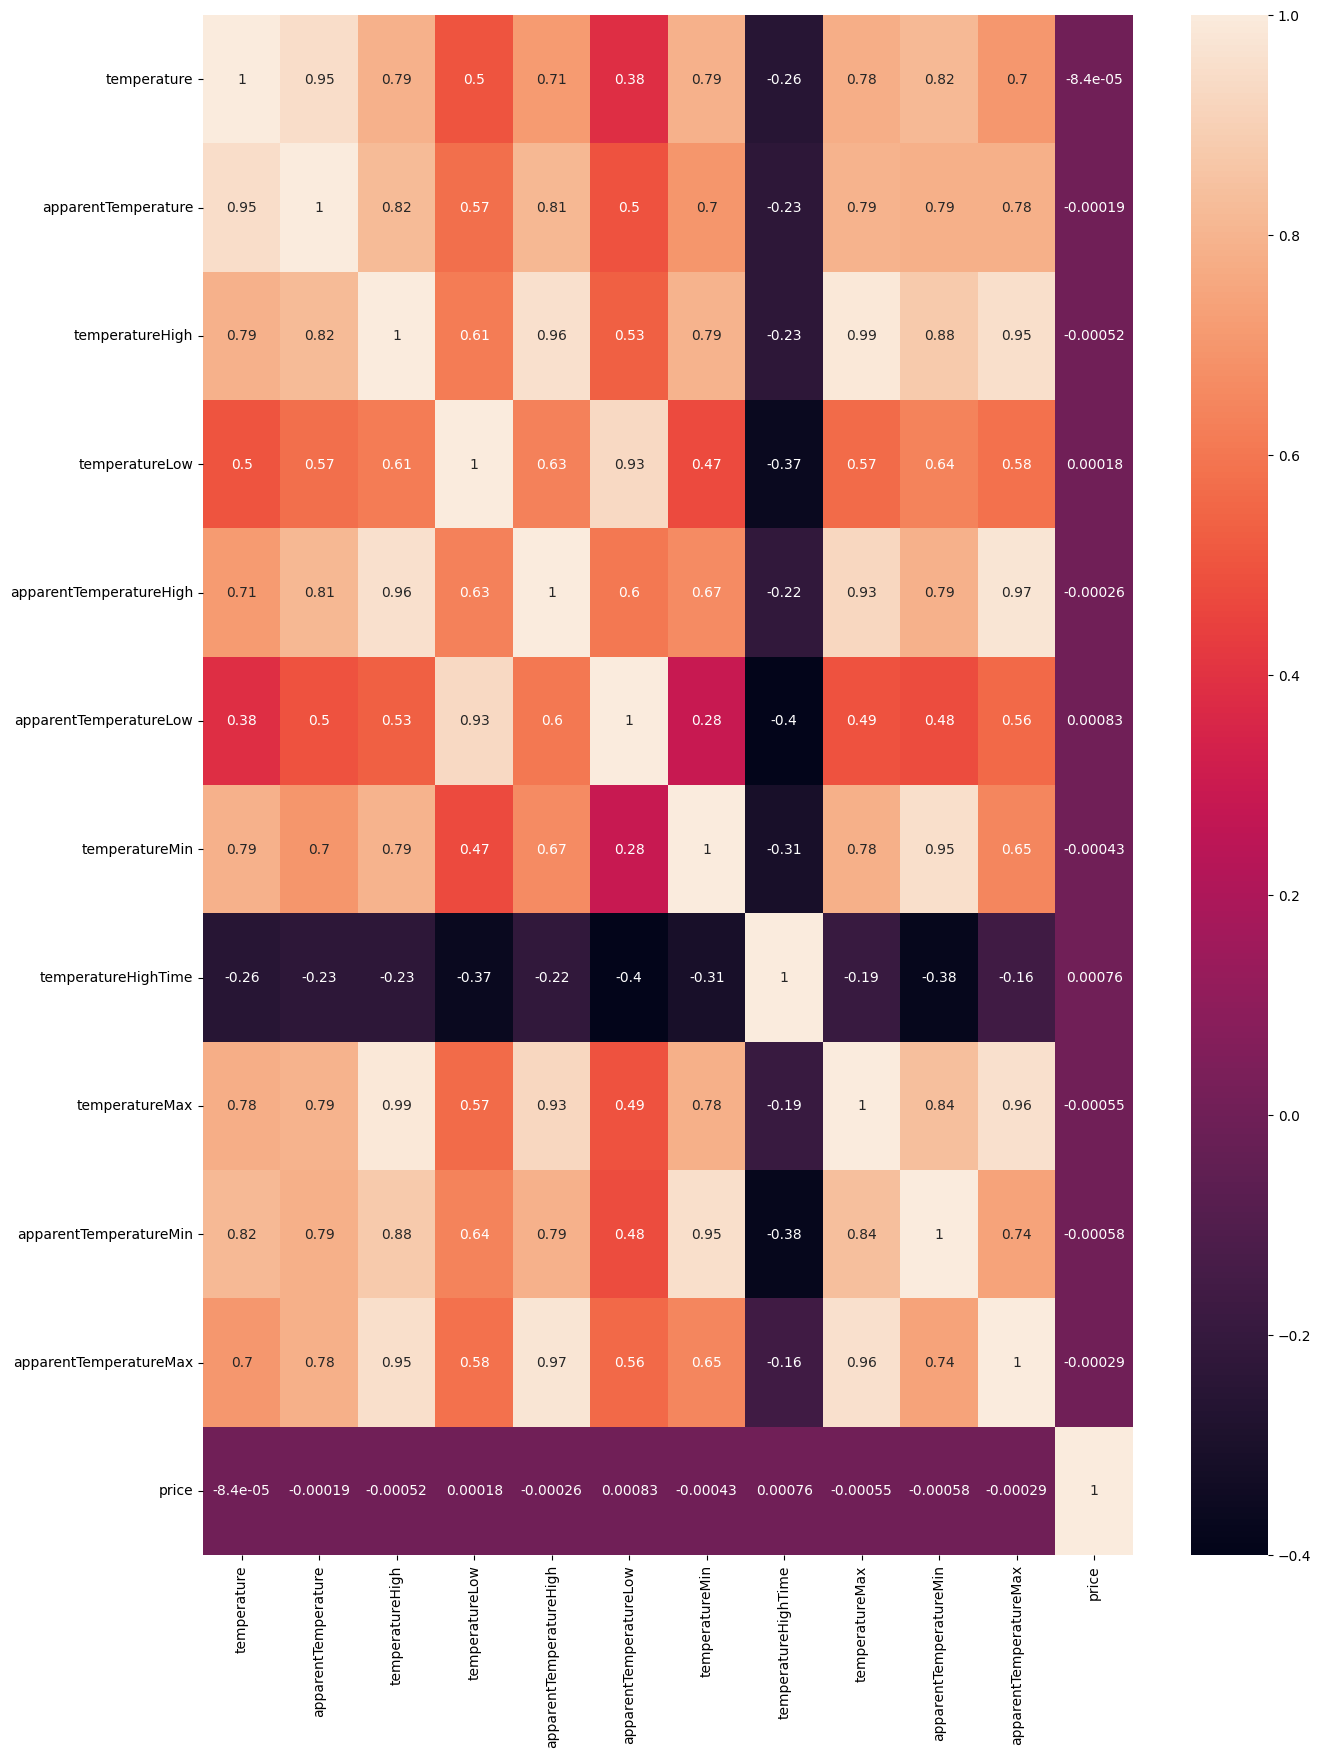

In [29]:
plt.figure(figsize=(15,20))
sns.heatmap(df_temp.corr(),annot=True)

We see that all temperature related features have weak correlation with our target feature which is price¶


In [30]:
new_df = new_df.drop(['temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
                'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin','apparentTemperatureMax'],axis=1)
new_df.shape

(637976, 31)

Second, i want to check the correlation of our cilmate related features with our target feature (Price)

In [31]:
climate_column = ['precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'ozone', 'moonPhase',
       'precipIntensityMax','price']
df_clim = new_df[climate_column]
df_clim.head()

,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,moonPhase,precipIntensityMax,price
0,0.0000,0.0,0.68,8.66,9.17,10.000,32.70,1021.98,57,0.72,0,303.8,0.30,0.1276,5.0
1,0.1299,1.0,0.94,11.98,11.98,4.786,41.83,1003.97,90,1.00,0,291.1,0.64,0.1300,11.0
2,0.0000,0.0,0.75,7.33,7.33,10.000,31.10,992.28,240,0.03,0,315.7,0.68,0.1064,7.0
3,0.0000,0.0,0.73,5.28,5.28,10.000,26.64,1013.73,310,0.00,0,291.1,0.75,0.0000,26.0
4,0.0000,0.0,0.70,9.14,9.14,10.000,28.61,998.36,303,0.44,0,347.7,0.72,0.0001,9.0


<Axes: >

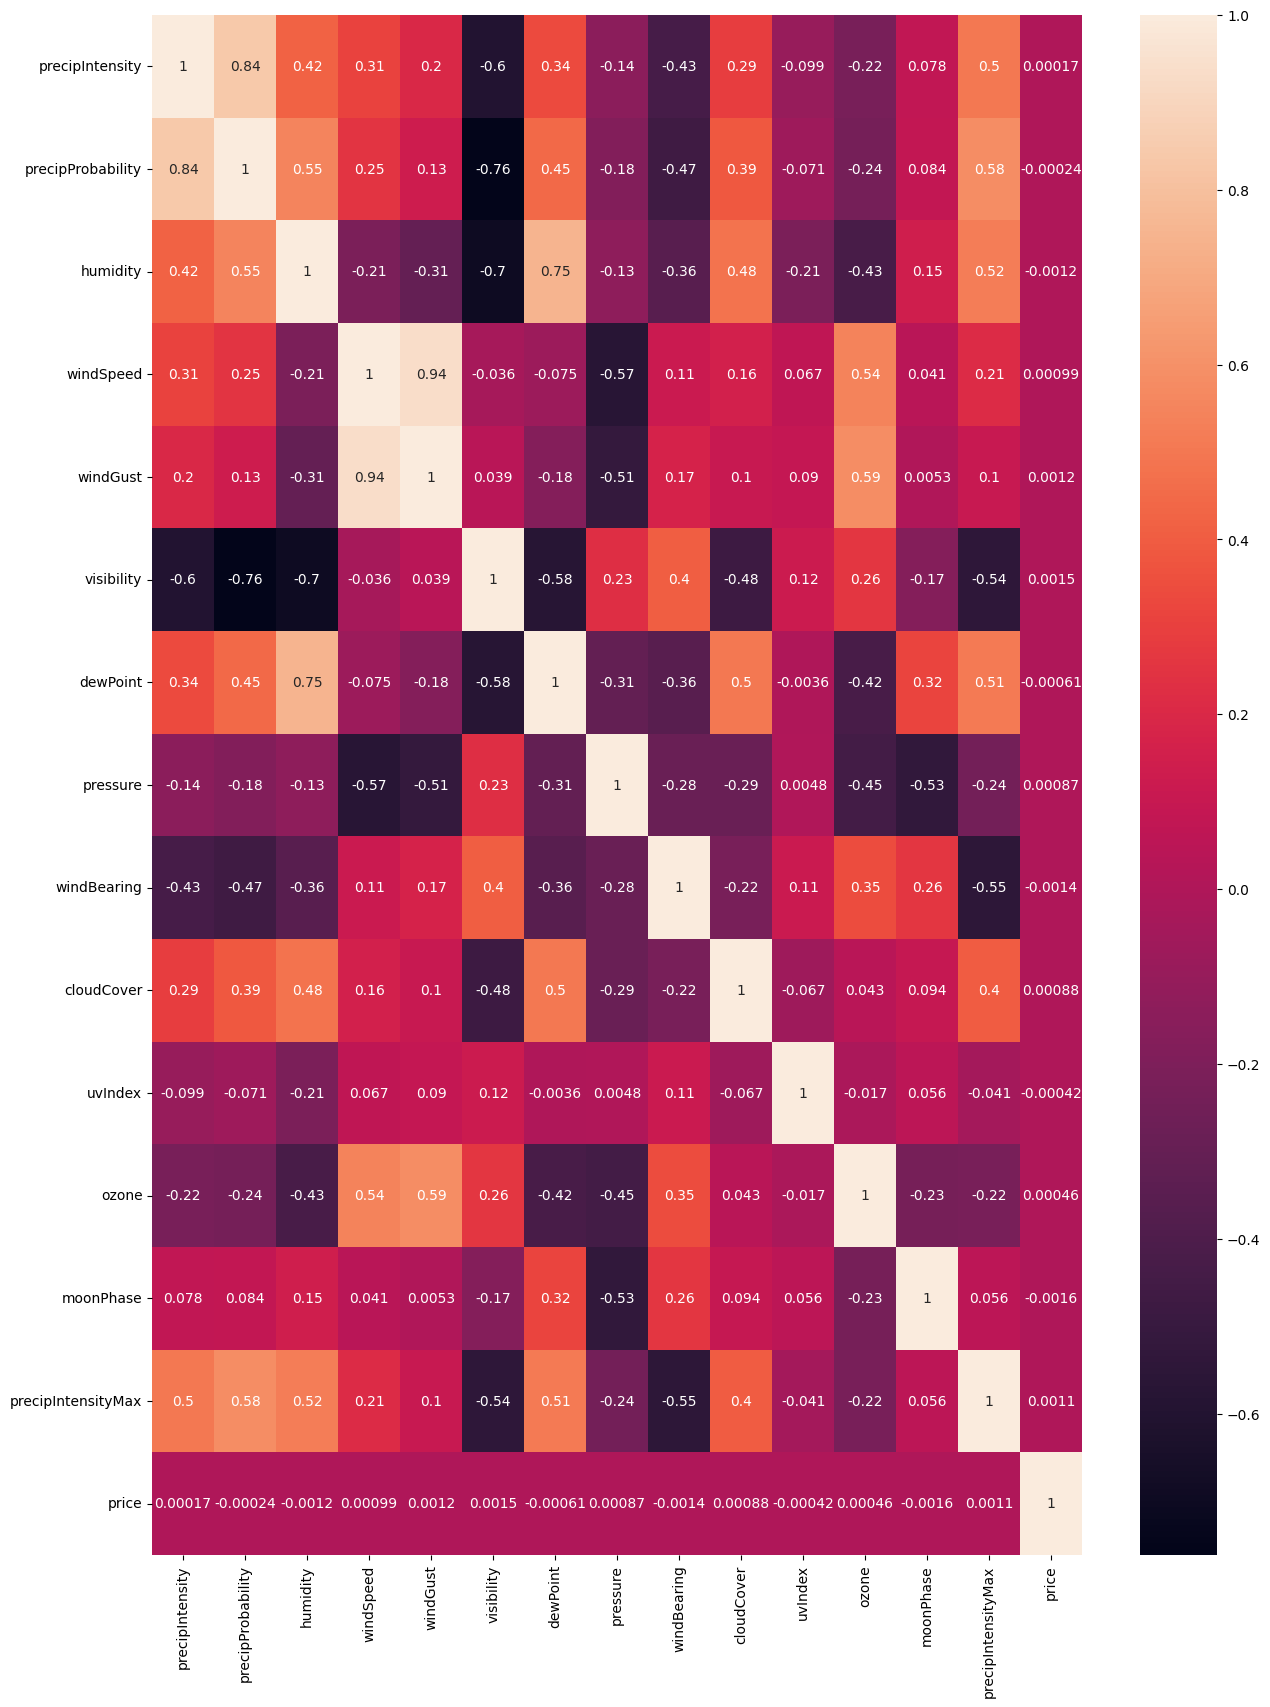

In [32]:
plt.figure(figsize=(15,20))
sns.heatmap(df_clim.corr(),annot=True)

Once again, removing all of them will not make any impact to our regression model¶


In [33]:
new_df = new_df.drop(['precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'ozone', 'moonPhase',
       'precipIntensityMax'],axis=1)
new_df.shape

(637976, 17)

In [34]:
new_df = new_df.drop(['timezone','product_id'],axis=1)

In [35]:
new_df.shape


(637976, 15)

 i want to check the correlation of our categorical features with our target feature (price)¶


In [36]:
new_cat = ['source',
 'destination',
 'cab_type',
 'name',
 'short_summary',
 'icon','price']

df_cat = new_df[new_cat]
df_cat.head()

,source,destination,cab_type,name,short_summary,icon,price
0,Haymarket Square,North Station,Lyft,Shared,Mostly Cloudy,partly-cloudy-night,5.0
1,Haymarket Square,North Station,Lyft,Lux,Rain,rain,11.0
2,Haymarket Square,North Station,Lyft,Lyft,Clear,clear-night,7.0
3,Haymarket Square,North Station,Lyft,Lux Black XL,Clear,clear-night,26.0
4,Haymarket Square,North Station,Lyft,Lyft XL,Partly Cloudy,partly-cloudy-night,9.0


In [37]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 637976 entries, 0 to 693070
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   hour              637976 non-null  int64  
 1   day               637976 non-null  int64  
 2   month             637976 non-null  int64  
 3   source            637976 non-null  object 
 4   destination       637976 non-null  object 
 5   cab_type          637976 non-null  object 
 6   name              637976 non-null  object 
 7   price             637976 non-null  float64
 8   distance          637976 non-null  float64
 9   surge_multiplier  637976 non-null  float64
 10  latitude          637976 non-null  float64
 11  longitude         637976 non-null  float64
 12  short_summary     637976 non-null  object 
 13  icon              637976 non-null  object 
 14  visibility.1      637976 non-null  float64
dtypes: float64(6), int64(3), object(6)
memory usage: 77.9+ MB


In [38]:
new_df.columns


Index(['hour', 'day', 'month', 'source', 'destination', 'cab_type', 'name',
       'price', 'distance', 'surge_multiplier', 'latitude', 'longitude',
       'short_summary', 'icon', 'visibility.1'],
      dtype='object')

In [39]:


columns_to_keep = ['cab_type', 'name', 'price', 'distance', 'surge_multiplier']

new_df = new_df[columns_to_keep]


In [40]:
new_df.head()

,cab_type,name,price,distance,surge_multiplier
0,Lyft,Shared,5.0,0.44,1.0
1,Lyft,Lux,11.0,0.44,1.0
2,Lyft,Lyft,7.0,0.44,1.0
3,Lyft,Lux Black XL,26.0,0.44,1.0
4,Lyft,Lyft XL,9.0,0.44,1.0


In [41]:
import pandas as pd

columns_to_encode = ['cab_type', 'name']

new_df_encoded = pd.get_dummies(new_df, columns=columns_to_encode).astype(int)

print(new_df_encoded.head())


   price  distance  surge_multiplier  cab_type_Lyft  cab_type_Uber  \
0      5         0                 1              1              0   
1     11         0                 1              1              0   
2      7         0                 1              1              0   
3     26         0                 1              1              0   
4      9         0                 1              1              0   

   name_Black  name_Black SUV  name_Lux  name_Lux Black  name_Lux Black XL  \
0           0               0         0               0                  0   
1           0               0         1               0                  0   
2           0               0         0               0                  0   
3           0               0         0               0                  1   
4           0               0         0               0                  0   

   name_Lyft  name_Lyft XL  name_Shared  name_UberPool  name_UberX  \
0          0             0            1 

In [42]:
new_df_encoded.head()


,price,distance,surge_multiplier,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,5,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,11,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,26,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,9,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0


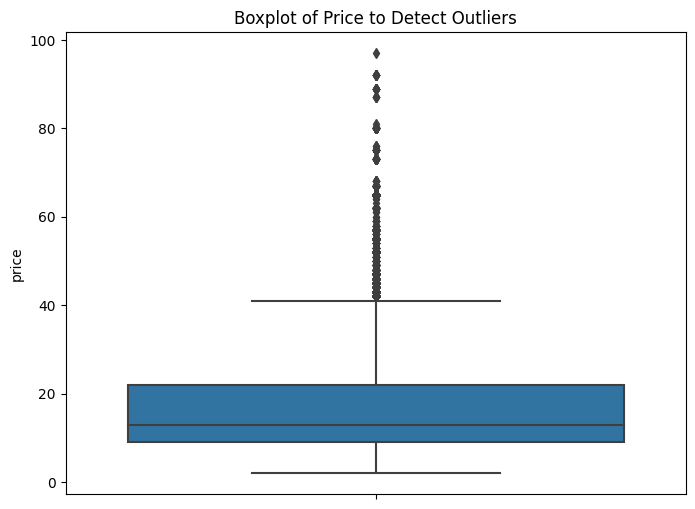

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# رسم boxplot للكشف عن النقاط الشاذة في عمود price
plt.figure(figsize=(8, 6))
sns.boxplot(y=new_df_encoded['price'])
plt.title('Boxplot of Price to Detect Outliers')
plt.show()


count    629771.000000
mean         15.856456
std           8.597761
min           2.000000
25%           9.000000
50%          13.000000
75%          22.000000
max          41.000000
Name: price, dtype: float64


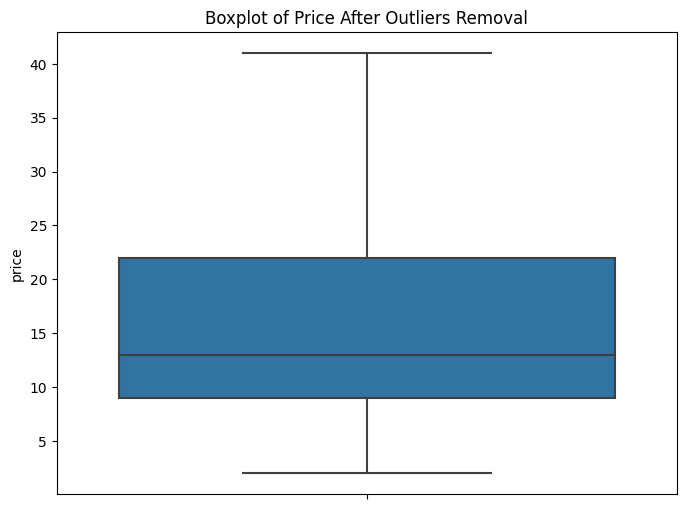

In [44]:
import numpy as np

# حساب الربع الأول (Q1) والربع الثالث (Q3)
Q1 = new_df_encoded['price'].quantile(0.25)
Q3 = new_df_encoded['price'].quantile(0.75)

# حساب IQR
IQR = Q3 - Q1

# تحديد الحدود لإزالة النقاط الشاذة
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# إزالة النقاط الشاذة التي تكون أقل من الحد الأدنى أو أكبر من الحد الأقصى
new_df_wo_outliers = new_df_encoded[(new_df_encoded['price'] >= lower_bound) & (new_df_encoded['price'] <= upper_bound)]

# عرض بعض النتائج بعد إزالة الـ outliers
print(new_df_wo_outliers['price'].describe())

# رسم boxplot بعد إزالة النقاط الشاذة
plt.figure(figsize=(8, 6))
sns.boxplot(y=new_df_wo_outliers['price'])
plt.title('Boxplot of Price After Outliers Removal')
plt.show()


In [45]:

y = new_df_wo_outliers['price']

X = new_df_wo_outliers.drop('price', axis=1)



In [46]:
X.head()


,distance,surge_multiplier,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [47]:
y.head()


0     5
1    11
2     7
3    26
4     9
Name: price, dtype: int64

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [49]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.preprocessing import StandardScaler

# دالة لاختيار أفضل نموذج باستخدام GridSearchCV
def find_best_model_using_gridsearchcv(X, y):
    # تقييس البيانات
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {}  # إزالة normalize
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)

    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X_scaled, y)  # استخدم البيانات المقياسية
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

import warnings
warnings.filterwarnings('ignore')

# استدعاء الدالة واستخراج النتائج
best_models = find_best_model_using_gridsearchcv(X, y)
print(best_models)


               model  best_score  \
0  linear_regression    0.913741   
1              lasso    0.774387   
2      decision_tree    0.938947   

                                         best_params  
0                                                 {}  
1                {'alpha': 1, 'selection': 'random'}  
2  {'criterion': 'squared_error', 'splitter': 'be...  


In [50]:

from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler



# تقييس البيانات
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# إنشاء نموذج DNN
model = Sequential()

# إضافة طبقة إدخال
model.add(Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]))  # 64 خلية في الطبقة الأولى

# إضافة طبقات مخفية
model.add(Dense(32, activation='relu'))  # 32 خلية في الطبقة الثانية
model.add(Dense(16, activation='relu'))  # 16 خلية في الطبقة الثالثة

# إضافة طبقة إخراج
model.add(Dense(1))  # طبقة الإخراج لمتغير مستمر (مثل price)

# تجميع النموذج
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# تدريب النموذج
model.fit(X_train_scaled, y_train, epochs=150, batch_size=32, validation_split=0.2)

# تقييم النموذج
loss, mae = model.evaluate(X_test_scaled, y_test)
print(f'Mean Absolute Error: {mae}')


Epoch 1/150


I0000 00:00:1727447911.143016      70 service.cc:145] XLA service 0x7fc4540014c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1727447911.143059      70 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


   99/11021 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 255.7835 - mae: 13.0781

I0000 00:00:1727447912.227131      70 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


11021/11021 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - loss: 14.0482 - mae: 2.0001 - val_loss: 4.8289 - val_mae: 1.5565
Epoch 2/150
11021/11021 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 4.7698 - mae: 1.4858 - val_loss: 4.7404 - val_mae: 1.5160
Epoch 3/150
11021/11021 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 4.7008 - mae: 1.4742 - val_loss: 4.7031 - val_mae: 1.4559
Epoch 4/150
11021/11021 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 4.6553 - mae: 1.4679 - val_loss: 4.6005 - val_mae: 1.4494
Epoch 5/150
11021/11021 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 4.6607 - mae: 1.4668 - val_loss: 4.5867 - val_mae: 1.4417
Epoch 6/150
11021/11021 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 4.7189 - mae: 1.4701 - val_loss: 4.5962 - val_mae: 1.4694
Epoch 7/150
11021/11021 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 4.6352 - mae: 1.4631 - val_loss: 4.6231 - val_mae: 1.4664
Epoch 8/150
11021/11021 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 4.6038 - mae: 1.4609 - val_loss: 4.5899 - val_mae: 1.4595
Epoch 9/150
11021/1